<a href="https://colab.research.google.com/github/lonerpatti/BigDataPos/blob/main/Exemplo_iris2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
from google.colab import files
uploaded = files.upload()


Saving wine.csv to wine.csv


Esses dados são resultados de uma análise química de vinhos cultivados na mesma região da Itália, mas derivados de três cultivares diferentes. A análise determinou as quantidades de 13 constituintes encontrados em cada um dos três tipos de vinhos.

Os atributos são:

0) Cultivar

1) Álcool

2) Ácido málico

3) Cinzas

4) Alcalinidade das cinzas

5) Magnésio

6) Fenóis totais

7) Flavanóides

8) Fenóis não flavonóides

9) Proantocianinas

10) Intensidade de cor

11) Matiz

12) OD280 / OD315 de vinhos diluídos

13) Prolina

NOTA: o primeiro atributo é o identificador de classe (1-3) relacionado aos cultívares.

Em um contexto de classificação, este é um problema bem colocado com estruturas de classe "bem comportadas". Um bom conjunto de dados para o primeiro teste de um novo classificador, mas não muito desafiador.


Base de dados
Fonte:
- Proprietários originais:
Forina, M. et al, PARVUS - um pacote extensível para exploração de dados, classificação e correlação.
Instituto de Análise e Tecnologia Farmacêutica e Alimentar, Via Brigata Salerno, 16147 Gênova, Itália.
- Doador:
Stefan Aeberhard, e-mail: stefan '@' coral.cs.jcu.edu.au
Site Machine Learning Repository, especificamente o [Wine Data Set] disponível em (http://archive.ics.uci.edu/ml/datasets/Wine). Todos os direitos reservados.

In [49]:
# importando todas as bibliotecas importantes para cálculo e criação de visualização gráfica
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# importando o arquivo
df = pd.read_csv('/content/wine.csv', sep=';')
df.head()

,class,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


**Dimensão do DataFrame**

In [50]:
print(df.shape)

(178, 14)


Resultado: retorna a quantidade de linhas e colunas do DataFrame que será utilizado.

**Resumo estatístico**

In [51]:
print(df.describe())

            class     Alcohol  Malic.acid  ...         Hue          OD      Proline
count  178.000000  178.000000  178.000000  ...  178.000000  178.000000   178.000000
mean     1.938202   13.000618    2.336348  ...    0.957449    2.611685   746.893258
std      0.775035    0.811827    1.117146  ...    0.228572    0.709990   314.907474
min      1.000000   11.030000    0.740000  ...    0.480000    1.270000   278.000000
25%      1.000000   12.362500    1.602500  ...    0.782500    1.937500   500.500000
50%      2.000000   13.050000    1.865000  ...    0.965000    2.780000   673.500000
75%      3.000000   13.677500    3.082500  ...    1.120000    3.170000   985.000000
max      3.000000   14.830000    5.800000  ...    1.710000    4.000000  1680.000000

[8 rows x 14 columns]


Resultado: antes de começar a fazer análises gerais, realizo uma descrição geral da base para ajudar a direcionar possíveis indicadores a serem buscados.

Distribuição de classe

In [52]:
print(df.groupby('class').size())

class
1    59
2    71
3    48
dtype: int64


Visualização dos dados

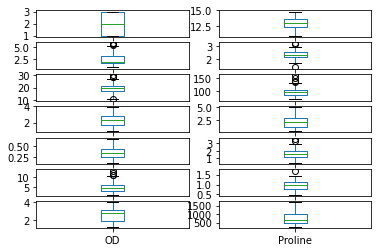

In [53]:
# gráfico de box and whisker
df.plot(kind='box', subplots=True, layout=(7,2), sharex=False, sharey=False)
plt.show()

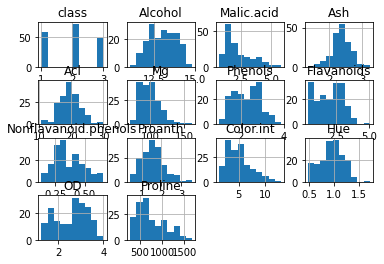

In [54]:
# histograma
df.hist()
plt.show()

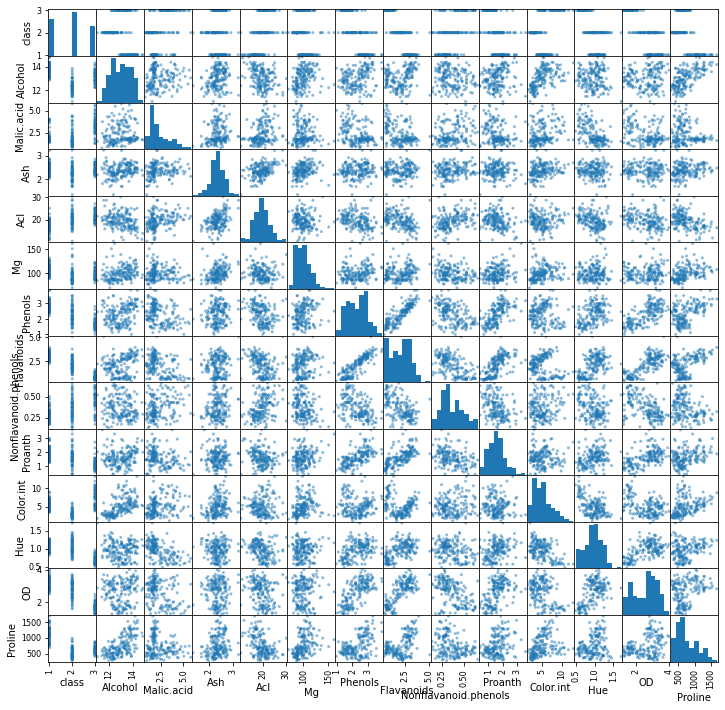

In [63]:
# gráfico de dispersão
scatter_matrix(df,figsize=(12,12))
plt.show()

Criar conjunto de validação

In [56]:
# conjunto de validação
array = df.values
X = array[:,1:13]
Y = array[:,0]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [57]:
# métricas
seed = 7
scoring = 'accuracy'

Regressão Logística (LR)
Análise Linear Discriminante (LDA)
K-vizinhos mais próximos (KNN)
Árvores de Classificação (Decision Tree) e Regressão (CART)
Gaussian Naive Bayes (NB)
Support Vector Machines (SVM)

In [70]:
# algoritmos
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
   kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
   cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
   results.append(cv_results)
   names.append(name)
   msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
   print(msg)

LR: 0.921429 (0.108091)
LDA: 0.964762 (0.047581)
KNN: 0.802381 (0.063003)
CART: 0.916190 (0.082071)
NB: 0.936190 (0.108069)
SVM: 0.874286 (0.073900)


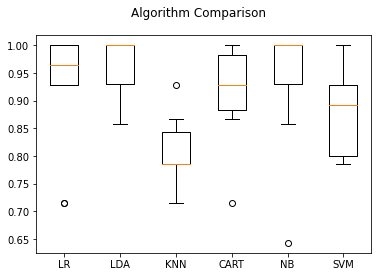

In [71]:
# comparar algoritmos
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [72]:
# precisão do modelo no conjunto de validação
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.7777777777777778
[[ 7  0  0]
 [ 3 13  1]
 [ 3  1  8]]
              precision    recall  f1-score   support

         1.0       0.54      1.00      0.70         7
         2.0       0.93      0.76      0.84        17
         3.0       0.89      0.67      0.76        12

    accuracy                           0.78        36
   macro avg       0.79      0.81      0.77        36
weighted avg       0.84      0.78      0.79        36

